# Multi-dimensional markov chain indexing 

In [1]:
%run ../notebook_preamble.ipy

import seaborn as sns
from snepits.pyovpyx import idx_to_state, el_f_gen, barsize

## Basic functions

In [113]:
Ns = np.array([10])
R = 2  # Number of infection levels
A = Ns.size  # Number of demographic levels

`barsize` gives the size of the state space for a given model

In [30]:
barsize(A, R, Ns)

60

We can go from an integer index of the transition matrix $i$ to an infection state in our system using `idx_to_state`

In [31]:
state = idx_to_state(10, A, R, Ns)
state

array([1, 0, 0, 0])

`el_f_gen` allows us to go from a state back to an integer index

In [32]:
el_f_gen(Ns, state)

10

If we enumerate all the indices of the chain (up to the statespace size given by `barsize`), apply `idx_to_state` then `el_f_gen` we should end up with the same index again:

In [33]:
# Test applying transform and inverse gives back the same
for i in range(barsize(A, R, Ns)):
    print(i, end='-> ')
    data = idx_to_state(i, len(Ns), R, Ns)
    print(data, end='-> ')
    idx = el_f_gen(Ns, data)
    print(idx)
    assert i == idx, f"{i} != {idx}"

0-> [0 0 0 0]-> 0
1-> [0 0 1 0]-> 1
2-> [0 0 0 1]-> 2
3-> [0 0 2 0]-> 3
4-> [0 0 1 1]-> 4
5-> [0 0 0 2]-> 5
6-> [0 0 3 0]-> 6
7-> [0 0 2 1]-> 7
8-> [0 0 1 2]-> 8
9-> [0 0 0 3]-> 9
10-> [1 0 0 0]-> 10
11-> [1 0 1 0]-> 11
12-> [1 0 0 1]-> 12
13-> [1 0 2 0]-> 13
14-> [1 0 1 1]-> 14
15-> [1 0 0 2]-> 15
16-> [1 0 3 0]-> 16
17-> [1 0 2 1]-> 17
18-> [1 0 1 2]-> 18
19-> [1 0 0 3]-> 19
20-> [0 1 0 0]-> 20
21-> [0 1 1 0]-> 21
22-> [0 1 0 1]-> 22
23-> [0 1 2 0]-> 23
24-> [0 1 1 1]-> 24
25-> [0 1 0 2]-> 25
26-> [0 1 3 0]-> 26
27-> [0 1 2 1]-> 27
28-> [0 1 1 2]-> 28
29-> [0 1 0 3]-> 29
30-> [2 0 0 0]-> 30
31-> [2 0 1 0]-> 31
32-> [2 0 0 1]-> 32
33-> [2 0 2 0]-> 33
34-> [2 0 1 1]-> 34
35-> [2 0 0 2]-> 35
36-> [2 0 3 0]-> 36
37-> [2 0 2 1]-> 37
38-> [2 0 1 2]-> 38
39-> [2 0 0 3]-> 39
40-> [1 1 0 0]-> 40
41-> [1 1 1 0]-> 41
42-> [1 1 0 1]-> 42
43-> [1 1 2 0]-> 43
44-> [1 1 1 1]-> 44
45-> [1 1 0 2]-> 45
46-> [1 1 3 0]-> 46
47-> [1 1 2 1]-> 47
48-> [1 1 1 2]-> 48
49-> [1 1 0 3]-> 49
50-> [0 2 0 0]-> 50


## Visualising patterns

The patterns evident in counting in a lexicographical manner are best seen visually:

In [190]:
# Helper function
def plot_state_pattern(X, A=None, R=None):
    """ Plot mapping between index and state """
    sns.set_context("notebook", font_scale=1.25)
    
    annot = True if X.shape[1] <= 36 else False
    
    fig, ax = plt.subplots(
        figsize=(16, 16/(X.shape[1]/X.shape[0])*1.7+2),
        nrows=2,
        gridspec_kw={"height_ratios": [X.shape[0], 1]},
        sharex=True,
    )
    h = sns.heatmap(X, square=False, cbar=None, ax=ax[0], annot=annot, cmap="Reds")
    ax[0].set_ylabel("State-space index")
    ax[0].set_title("Intensity of square = number of people in that state")

    # Plot total infected for each index
    h2 = sns.heatmap(
        X.sum(0).to_frame("Infected").T,
        cbar=None,
        ax=ax[1],
        annot=annot,
        cmap="Blues",
    )
    h2.set_yticklabels(h2.get_yticklabels(), rotation=0)
    ax[1].set_xlabel("Matrix index")

    if A is not None and R is not None:
        fig.suptitle(f"(A, R) = {(A, R)}", y=-0.01)
    fig.tight_layout()
    return fig

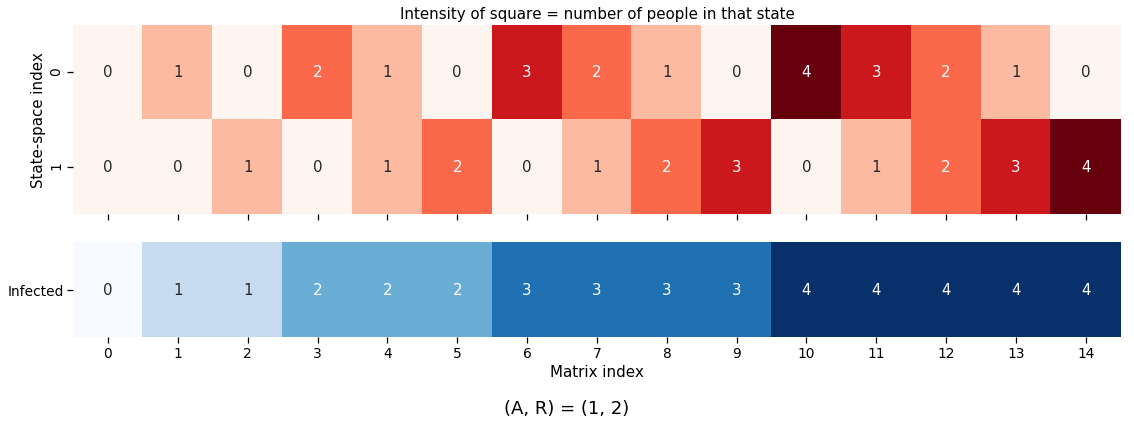

In [191]:
Ns = np.array([4])
R = 2  # Number of infection levels
A = Ns.size  # Number of demographic levels

X = pd.DataFrame([idx_to_state(i, A, R, Ns) for i in range(barsize(A, R, Ns))]).T
plot_state_pattern(X, A, R);

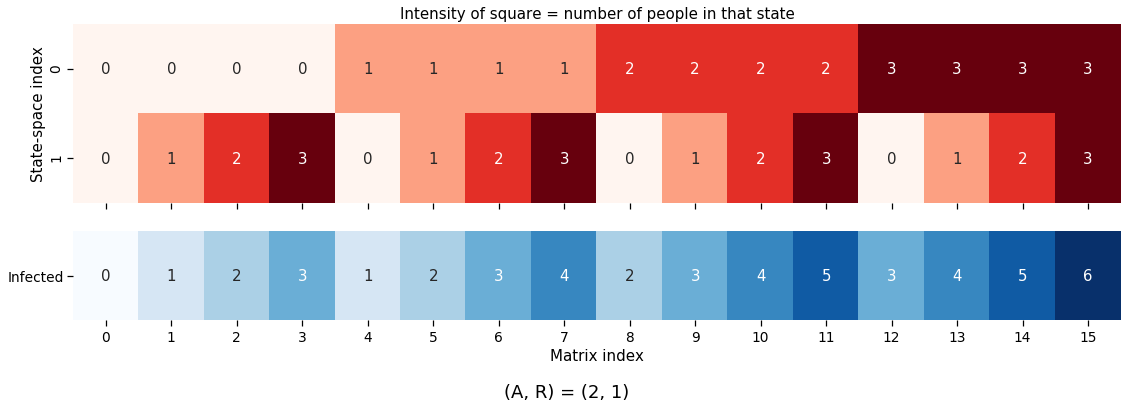

In [185]:
Ns = np.array([3, 3])
R = 1  # Number of infection levels
A = Ns.size  # Number of demographic levels

X = pd.DataFrame([idx_to_state(i, A, R, Ns) for i in range(barsize(A, R, Ns))]).T
plot_state_pattern(X, A, R);

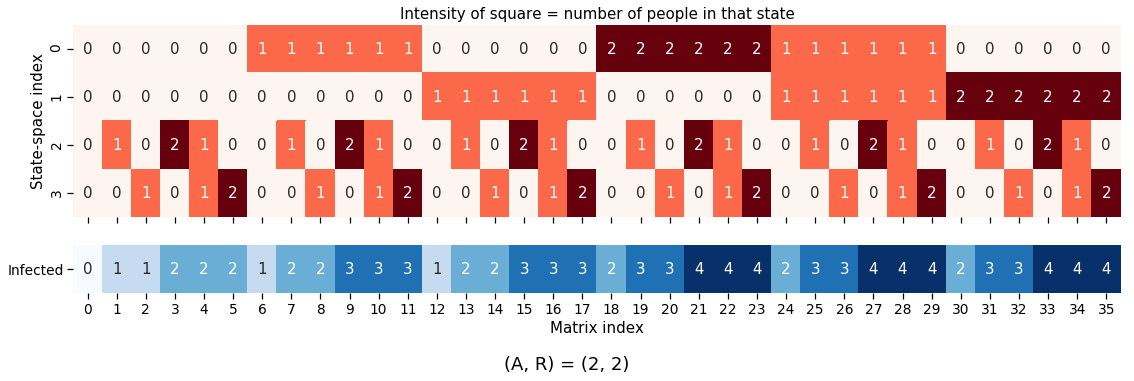

In [186]:
Ns = np.array([2, 2])
R = 2  # Number of infection levels
A = Ns.size  # Number of demographic levels

X = pd.DataFrame([idx_to_state(i, A, R, Ns) for i in range(barsize(A, R, Ns))]).T
plot_state_pattern(X, A, R);

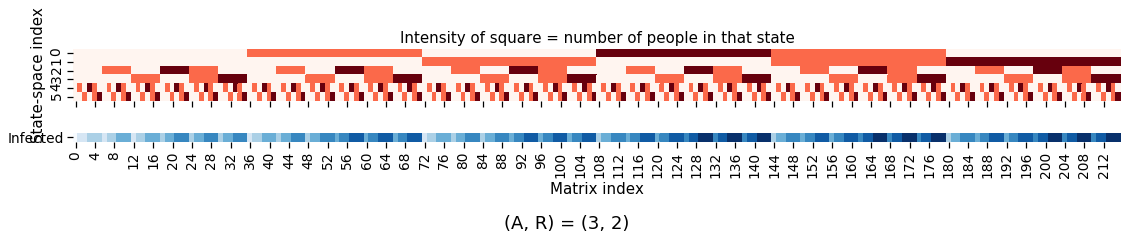

In [187]:
Ns = np.array([2, 2, 2])
R = 2  # Number of infection levels
A = Ns.size  # Number of demographic levels

X = pd.DataFrame([idx_to_state(i, A, R, Ns) for i in range(barsize(A, R, Ns))]).T
plot_state_pattern(X, A, R);

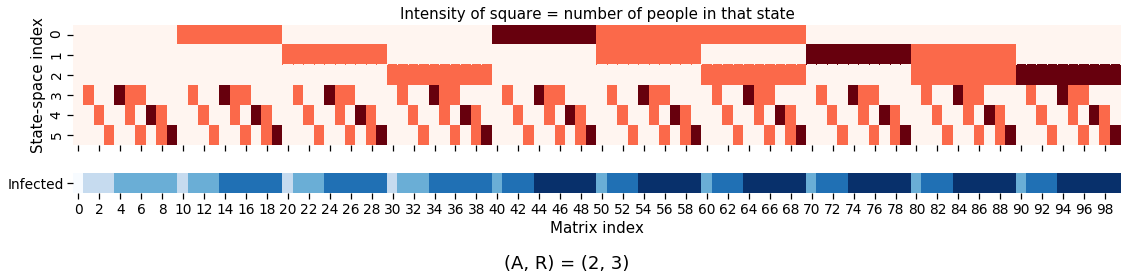

In [189]:
Ns = np.array([2, 2])
R = 3  # Number of infection levels
A = Ns.size  # Number of demographic levels

X = pd.DataFrame([idx_to_state(i, A, R, Ns) for i in range(barsize(A, R, Ns))]).T
plot_state_pattern(X, A, R);